In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warning messages
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\modified\\Tmodified.csv")
train.head(1)

,id,age,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,price
0,7309831550,16,13,m45,excellent,3,0,214740.0,clean,automatic,2,sedan,other,7995


In [3]:
train.price.isnull().sum()

0

In [4]:
test=pd.read_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\modified\\Smodified.csv")
test.head(1)

,id,age,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,7313399730,5,3,civic,like new,0,0,28898.0,clean,automatic,1,sedan,other


In [5]:
train.shape,test.shape

((290129, 14), (124341, 13))

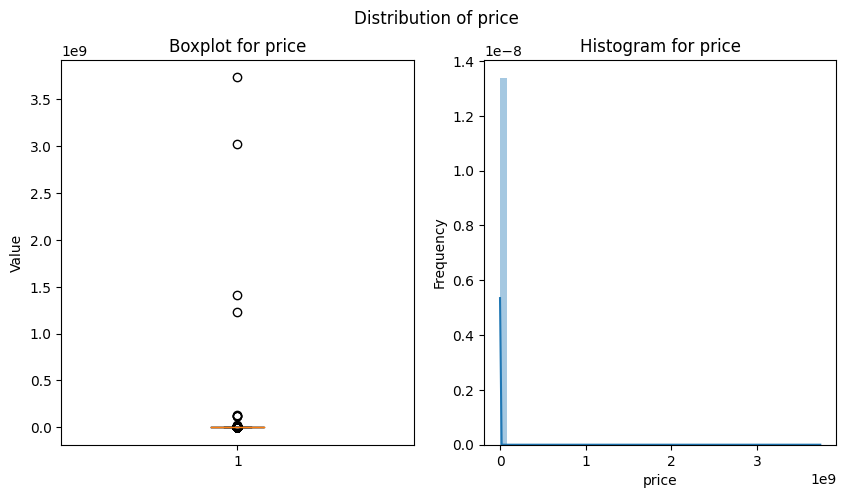

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.boxplot(x=train['price'])
ax1.set_title('Boxplot for price')


sns.distplot(train['price'])
ax2.set_title('Histogram for price')

# Add labels and titles
fig.suptitle('Distribution of price')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

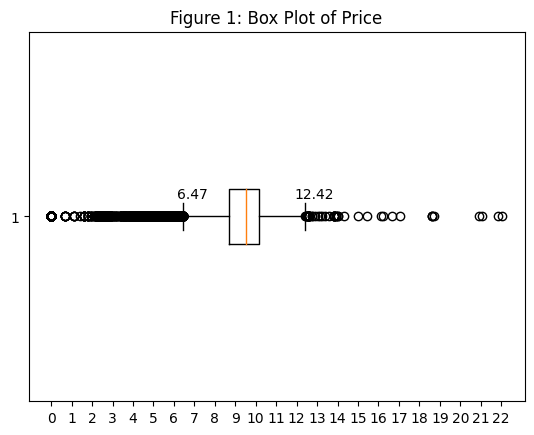

In [7]:
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    r.append(q1-1.5*(q3-q1))
    r.append(q3+1.5*(q3-q1))
    return (r)
train['logprice'] = np.log(train['price'])
x=train['logprice']
price_range=list(range(0,int(max(train['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(train)[0]-0.3,1.05,str(round(min_max_price(train)[0],2)))
plt.text(min_max_price(train)[1]-0.5,1.05,str(round(min_max_price(train)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

In [8]:
# IQR
Q1 = np.percentile(train['price'], 25,method = 'midpoint')

Q3 = np.percentile(train['price'], 75, method = 'midpoint')
IQR = Q3 - Q1
print(IQR),print(Q1),print(Q3)

20509.0
5991.0
26500.0


(None, None, None)

In [9]:
train.price.max(), train.price.min()

(3736928711, 0)

In [10]:
(train.price<1000).sum(), (train.price>1000000).sum()

(30244, 20)

In [11]:
#train.loc[train['price']==0, 'age']= train.price.mean()
train = train[train['price'] <= 1000000]

In [12]:
train[['manufacturer', 'price']].groupby(['manufacturer'], as_index=False).mean().sort_values(by='price', ascending=False)

,manufacturer,price
14,14,27229.802850
0,0,23288.256123
5,5,23164.389782
10,10,19291.530555
1,1,19064.609557
4,4,19034.569378
11,11,18886.265527
2,2,18473.278228
8,8,18117.786244
13,13,17535.290032


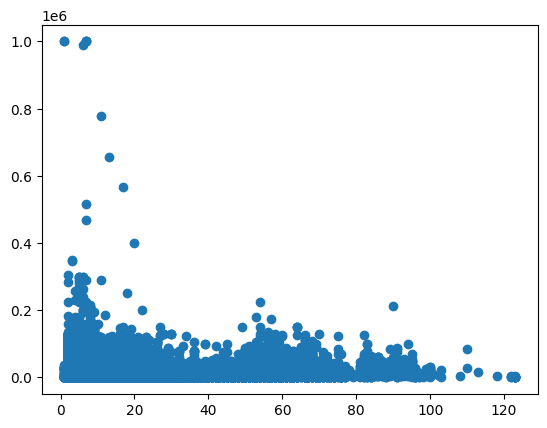

In [13]:
plt.scatter(train.age,train.price)

In [14]:
train.price.mean(),train.price.mean()

(17498.84517888104, 17498.84517888104)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))


ax1.boxplot(x=train['age'])
ax1.set_title('Boxplot for age')


sns.distplot(train['age'])
ax2.set_title('Histogram for age')

# Add labels and titles
fig.suptitle('Distribution of age')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()


In [ ]:
train.age.min(),train.age.max()

In [ ]:
(train.age>100).sum()

In [ ]:
# IQR
Q1 = np.percentile(train['age'], 25,method = 'midpoint')# in the new version the interpolation is changed to method

Q3 = np.percentile(train['age'], 75, method = 'midpoint')
IQR = Q3 - Q1
print(IQR),print(Q1),print(Q3)

In [ ]:
train.age.min(), train.age.max()

In [ ]:
train.age.median(),train.age.mean()

In [ ]:
train.loc[train['age'] > 60, 'age'] = 60
test.loc[test['age'] > 60, 'age'] =60

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.boxplot(x=train['age'])
ax1.set_title('Boxplot for age')


sns.distplot(train['age'])
ax2.set_title('Histogram for age')

# Add labels and titles
fig.suptitle('Distribution of age')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()


In [ ]:
plt.scatter(train.manufacturer,train.price)

In [ ]:
plt.scatter(train.odometer,train.price)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.boxplot(x=train['odometer'])
ax1.set_title('Boxplot for odometer')


sns.distplot(train['odometer'])
ax2.set_title('Histogram for odometer')

# Add labels and titles
fig.suptitle('Distribution of odometer')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

In [ ]:
train.loc[train['odometer'] >0.4e7, 'odometer'] = 0.4e7
test.loc[test['odometer'] >0.4e7, 'odometer'] = 0.4e7

In [ ]:
train.odometer.median(),train.odometer.mean()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


ax1.boxplot(x=train['odometer'])
ax1.set_title('Boxplot for odometer')


sns.distplot(train['odometer'])
ax2.set_title('Histogram for odometer')

# Add labels and titles
fig.suptitle('Distribution of odometer')
ax1.set_ylabel('Value')
ax2.set_ylabel('Frequency')
plt.show()

In [ ]:
train.odometer.min(),train.odometer.max()

In [ ]:
(train.odometer>0.4e7).sum()

In [ ]:
train.drop(['model','logprice'],axis=1,inplace=True)


In [ ]:
test.drop(['model'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ['condition','title_status', 'type', 'state','transmission','cylinders','drive']
for i in var_mod:
    train[i] = le.fit_transform(train[i])
########################################################################################################################

le = LabelEncoder()
#New variable for outlet
var_mod = ['condition','title_status', 'type', 'state','transmission','cylinders','drive']
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [ ]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket',annot=True, fmt=".2f")
plt.gcf().set_size_inches(9, 8)

In [ ]:
#plotting the correlation matrix
sns.heatmap(train.corr(method= 'spearman' ),cmap='rocket',annot=True, fmt=".2f")
plt.gcf().set_size_inches(9, 8)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
train_stand = train.copy()
test_stand = test.copy()

# numerical features
num_cols = [ 'age', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type', 'state']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(train_stand[[i]])
    
    # transform the training data column
    train_stand[i] = scale.transform(train_stand[[i]])
    
    # transform the testing data column
    test_stand[i] = scale.transform(test_stand[[i]])

In [ ]:
train_stand.to_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\modified\\train_modified.csv",index=False)
test_stand.to_csv("C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\modified\\test_modified.csv",index=False)
